# Support Vector Regression

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
from IPython.display import HTML

In [2]:
dataset=pd.read_csv('Position_Salaries.csv')
dataset.head(4)

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000


In [6]:
HTML(dataset.head(4).to_html(classes='table table-striped table-hover table-condensed'))

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000


### Split into Features and Target

In [3]:
X=dataset.iloc[:,1:2].values #Only using level of salary and making X a matrix of featues instead of array
y=dataset.iloc[:,2]

### Feature Scaling Automatically by Linear Regression Library, smaller dataset size so no split

In [4]:
# Fitting Linear Regression Model
from sklearn.linear_model import LinearRegression
lin_reg=LinearRegression()
lin_reg.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

### Feature Scaling (Unlike Linear Regression Feature Scaling Reqd)

In [5]:
from sklearn.preprocessing import StandardScaler

#Create two objects from Standard Scalar Class
sc_X=StandardScaler()
sc_y=StandardScaler()

# Transform Method to Scale X and y
X=sc_X.fit_transform(X)
y=sc_y.fit_transform(y)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:429: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, _DataConversionWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:586: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:649: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)


## Fitting Support Vector Regression

In [6]:
from sklearn.svm import SVR
regressor=SVR(kernel='rbf') #Gaussian Kernel
regressor.fit(X,y)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

## Plot Support Vector Regression

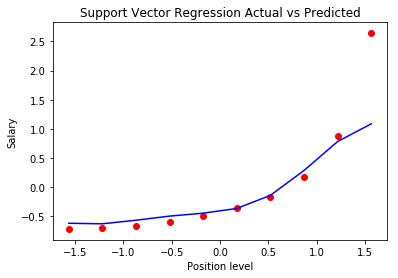

In [7]:
plt.scatter(X,y, color='red')
plt.plot(X, regressor.predict(X), color='blue')
plt.title('Support Vector Regression Actual vs Predicted')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show();

### The CEO salary is not being predicted by SVR as shown above
### It is being consodered as outlier by SVR Algorithm

## Predicting with Support Vector Regressor

In [11]:
y_pred=regressor.predict(6.5)
y_pred 

array([ 0.01158103])

In [12]:
sc_y.inverse_transform(regressor.predict(sc_X.transform(np.array([6.5]))))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:649: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


array([ 170370.0204065])

## Plotting in Higher Resolution

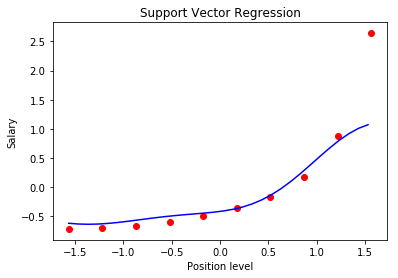

In [16]:
X_grid=np.arange(min(X), max(X),0.1)
X_grid=X_grid.reshape((len(X_grid),1))
# For prediction at higher resolution and more continuous curve

plt.scatter(X,y, color='red')
plt.plot(X_grid, regressor.predict(X_grid), color='blue')
plt.title('Support Vector Regression')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show();